In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
import zipfile
with zipfile.ZipFile("horse-or-human.zip","r") as zip_ref:
    zip_ref.extractall()

In [33]:
base = ''

train_path = os.path.join(base, 'main')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(rescale=1/255)

train_gen = train_data_generator.flow_from_directory(train_path, target_size=(150,150), class_mode='binary', batch_size=20 ) ## steps_per_epoch=100

Found 1027 images belonging to 2 classes.


In [34]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), input_shape=(150, 150, 3), activation=tf.nn.relu),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.tanh)
])

In [35]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [36]:
hist = model.fit(train_gen, epochs=10)

Epoch 1/10
52/52 [==============================] - 6s 108ms/step - loss: 1.4573 - acc: 0.5878
Epoch 2/10
52/52 [==============================] - 5s 97ms/step - loss: 0.4918 - acc: 0.8022
Epoch 3/10
52/52 [==============================] - 5s 95ms/step - loss: 0.2512 - acc: 0.9121
Epoch 4/10
52/52 [==============================] - 5s 98ms/step - loss: 0.1551 - acc: 0.9557
Epoch 5/10
52/52 [==============================] - 5s 96ms/step - loss: 0.1138 - acc: 0.9637
Epoch 6/10
52/52 [==============================] - 5s 99ms/step - loss: 0.0692 - acc: 0.9829
Epoch 7/10
52/52 [==============================] - 5s 96ms/step - loss: 0.0510 - acc: 0.9835
Epoch 8/10
52/52 [==============================] - 5s 96ms/step - loss: 0.0385 - acc: 0.9935
Epoch 9/10
52/52 [==============================] - 5s 91ms/step - loss: 0.0269 - acc: 0.9955
Epoch 10/10
52/52 [==============================] - 5s 92ms/step - loss: 0.0250 - acc: 0.9926: 3s - loss: 0.0249 - ac - ETA: 2s 


In [ ]:
print((tf.config.experimental.list_physical_devices()))

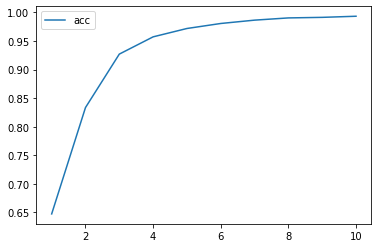

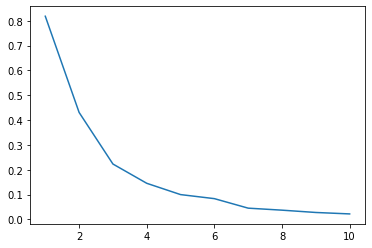

In [40]:
acc = hist.history['acc']
loss=hist.history['loss']
epochs = range(1, len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, label='acc')
plt.legend()
plt.show()
plt.plot(epochs, loss)
plt.show()